In [1]:
#| echo: false

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

## Problem 1 

This symmetric matrix is called the Hadamard matrix and it has orthogonal columns: 

$$
H = 
\begin{bmatrix}
1 & 1 & 1 & 1\\
1 & -1 & 1 & -1\\
1 & 1 & -1 & -1\\
1 & -1 & -1 & 1
\end{bmatrix}
$$

also, $H^2 = 4I$

(a) What is the determinant of $H$?  
(b) What are the eigenvalues of $H$?  
(c) What are the singular values of $H$?  

### Solution

#### (a)

We know $det(A^2) = det(A)^2$, Given $H^2 = 4I$,

$det(H) = \sqrt{det(H^2)} = \sqrt{det(4I)}$

We also know that $det(kA) = k^n det(A)$, where $n$ is the dimension of the square matrix $A$

$det(4I_4) = 4^4 det(I_4)$ 
$$
det(I_4) = 
\begin{vmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & 1
\end{vmatrix} = 1*det(I_3) + 0 + 0 + 0 
$$
$$
det(I_3) = 
\begin{vmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1 \\
\end{vmatrix} = 1*(1-0) + 0 + 0 = 1
$$
$$\therefore det(I_4) = 1 * 1 = 1$$

$$det(4I_4) = 4^4 * 1 = 64$$

$$det(H) = \sqrt{det(H^2)} = \sqrt{det(4I)} = \sqrt{64} = 16$$

#### (b)

For Eigen Values of H, we need to solve the Characteristic equation which is $|H - \lambda I| = 0$

$$
det(H - \lambda I) = 
\begin{vmatrix}
\begin{bmatrix}
1 & 1 & 1 & 1\\
1 & -1 & 1 & -1\\
1 & 1 & -1 & -1\\
1 & -1 & -1 & 1
\end{bmatrix}
- 
\begin{bmatrix}
\lambda & 0 & 0 & 0\\
0 & \lambda & 0 & 0\\
0 & 0 & \lambda & 0\\
0 & 0 & 0 & \lambda
\end{bmatrix}
\end{vmatrix} = 
\begin{vmatrix}
1-\lambda & 1 & 1 & 1\\
1 & -1-\lambda & 1 & -1\\
1 & 1 & -1-\lambda & -1\\
1 & -1 & -1 & 1-\lambda
\end{vmatrix}
$$

We know that the determinant doesn't changes when we do row operations of subtracting a multiple of a row with another row.

$R_3 = R_3 - R_2$

$R_4 = R_4 - R_2$

$\begin{vmatrix}
1-\lambda & 1 & 1 & 1\\
1 & -1-\lambda & 1 & -1\\
0 & 2+\lambda & -2-\lambda & 0\\
0 & \lambda & -2 & 2-\lambda
\end{vmatrix} = 0$

$=
(1-\lambda)
\begin{vmatrix}
-1-\lambda & 1 & -1\\
2+\lambda & -2-\lambda & 0\\
\lambda & -2 & 2-\lambda
\end{vmatrix} - 1 
\begin{vmatrix}
1 & 1 & -1\\
0 & -2-\lambda & 0\\
0 & -2 & 2-\lambda
\end{vmatrix} + 1
\begin{vmatrix}
1 & -1-\lambda & -1\\
0 & 2+\lambda & 0\\
0 & \lambda & 2-\lambda
\end{vmatrix} - 1
\begin{vmatrix}
1 & -1-\lambda & 1 \\
0 & 2+\lambda & -2-\lambda\\
0 & \lambda & -2
\end{vmatrix} = 0$

For $1^{st}$ sub determinant

$\begin{vmatrix}
-1-\lambda & 1 & -1\\
2+\lambda & -2-\lambda & 0\\
\lambda & -2 & 2-\lambda
\end{vmatrix} = 
-({1+\lambda})*(\lambda^2 - 4) - 1*(4 - \lambda^2) + (-1) * (\lambda^2 - 4)$

$= (\lambda^2 - 4) * (-1 - \lambda + 1 - 1)
= (\lambda + 1)*(4 - \lambda^2)$

For $2^{st}$ sub determinant

$\begin{vmatrix}
1 & 1 & -1\\
0 & -2-\lambda & 0\\
0 & -2 & 2-\lambda
\end{vmatrix} = 1 * -(4 - \lambda^2) = -(4-\lambda^2)$

For $3^{st}$ sub determinant

$\begin{vmatrix}
1 & -1-\lambda & -1\\
0 & 2+\lambda & 0\\
0 & \lambda & 2-\lambda
\end{vmatrix} = 1 * (4 - \lambda^2) = (4-\lambda^2)$

For $4^{st}$ sub determinant

$\begin{vmatrix}
1 & -1-\lambda & 1 \\
0 & 2+\lambda & -2-\lambda\\
0 & \lambda & -2
\end{vmatrix} = 1 * (-4 - 2\lambda + 2\lambda + \lambda^2) = (-4+\lambda^2) = -(4-\lambda^2)$

$det(H - \lambda I) =  (1 - \lambda)*(\lambda + 1)*(4 - \lambda^2) + (-1) * -(4-\lambda^2) + 1 * (4-\lambda^2) + (-1) *  -(4-\lambda^2) = 0$

$(4-\lambda^2)(1 - \lambda^2 + 1 + 1 + 1) = 0$

$(4-\lambda^2)(4 - \lambda^2) = 0$

$$ \lambda = \pm 2, \pm 2$$

Therefore, The Eigen Values for $H$ are $2, 2, -2, and -2$


#### (c)

If A is symmetric then $AA^T = A^TA=A^2$ and $U,V,\sum$ are square matrices. The eigenvectors of $A$ are also eigenvectors of $A^2$ with squared corresponding eigenvalues and the **singular values are the absolute values of the eigenvalues of $A$**

Since $H$ is a symmetric matrix, the Singular values of $H$ are $|2|, |2|, |-2|, |-2|$,

Singular Values of $H = 2,2,2,2$

## Problem 2

Calculate the Singular Value Decomposition for the following matrices.

$$
A = 
\begin{bmatrix}
1 & -1\\
0 & 1\\
1 & 0\\
\end{bmatrix}
$$

$$
B = 
\begin{bmatrix}
1 & 0 & 1\\
-1 & 1 & 0\\
\end{bmatrix}
$$

If $A=UΣV^T$ is an $SVD$ for $A$, Whatcan you say about the $SVD$ for $A^T$ ?

### Solution

We know $A=UΣV^T$

$A^T = (UΣV^T)^T = (V^T)^TΣ^TU^T = VΣU^T (Σ^T = Σ)$

And, $AA^T = UΣV^TVΣU^T = UΣ^2U^T (V.V^T = I)$

$$
AA^T = 
\begin{bmatrix}
2 & -1 & 1\\
-1 & 1 & 0\\
1 & 0 & 1\\
\end{bmatrix}
$$

Characteristic Equation to Find Eigen value is $|AA^T - \lambda I| = 0$


$$
|AA^T - \lambda I| = 
\begin{vmatrix}
2-\lambda & -1 & 1\\
-1 & 1-\lambda & 0\\
1 & 0 & 1-\lambda\\
\end{vmatrix} = 0
$$

$1*(0-(1-\lambda)) - 0 + (1-\lambda)*((1-\lambda)*(2-\lambda) - 1) = 0$

$(1-\lambda)*(-1+\lambda^2-3\lambda+1) = 0$

$(1-\lambda)*(\lambda^2-3\lambda) = 0$

$(1-\lambda)* \lambda *(\lambda-3) = 0$

$\lambda = 0,1,3$



For $\lambda = 0$

$A.v = \lambda.v$

$(A-\lambda I).v = 0$

$\begin{bmatrix}
2 & -1 & 1\\
-1 & 1 & 0\\
1 & 0 & 1\\
\end{bmatrix} 
\begin{bmatrix}
x_1\\
x_2\\
x_3\\
\end{bmatrix} = 0$

Performing Row Operations

$R_1 = R_1/2$  
$R_2 = R_2+R_1$   
$R_3 = R_3-R_1$  
$R_2 = R_2/2$   
$R_3 = R_3-0.5*R_2$  
$R_1 = R_1-0.5*R_2$  

$\begin{pmatrix}
1 & 0 & 1\\
0 & 1 & 1\\
0 & 0 & 0
\end{pmatrix}
\begin{bmatrix}
x_1\\
x_2\\
x_3\\
\end{bmatrix} = 0$

$x_3 = -x_2$ and $x3 = -x_1$

Eigen Vector corresponding to $\lambda = 0$ is $\begin{bmatrix}
-1\\
-1\\
1\\
\end{bmatrix}$

Similarly the Eigen Vectors for $\lambda = 1$ is $\begin{bmatrix}
0\\
1\\
1\\
\end{bmatrix}$

And the Eigen Vectors for $\lambda = 3$ is $\begin{bmatrix}
-2\\
1\\
-1\\
\end{bmatrix}$

$Σ^2 = 
\begin{pmatrix}
3 & 0 & 0\\
0 & 1 & 0\\
0 & 0 & 0
\end{pmatrix}$

$Σ = 
\begin{pmatrix}
\sqrt3 & 0 & 0\\
0 & 1 & 0\\
0 & 0 & 0
\end{pmatrix}$

$U = 
\begin{pmatrix}
-2/\sqrt6 & 0 & -1/\sqrt3\\
1/\sqrt6 & 1/\sqrt2 & -1/\sqrt3\\
-1/\sqrt6 & 1/\sqrt2 & 1/\sqrt3
\end{pmatrix}$

Similarly, $A^TA = VΣU^TUΣV^T = VΣ^2V^T (U.U^T = I)$

$$
AA^T = 
\begin{bmatrix}
2 & -1\\
-1 & 2\\
\end{bmatrix}
$$

Characteristic Equation to Find Eigen value is $|AA^T - \lambda I| = 0$


$$
|AA^T - \lambda I| = 
\begin{bmatrix}
2-\lambda & -1\\
-1 & 2-\lambda\\
\end{bmatrix} = 0
$$

$ (2-\lambda)^2 - 1 = 0$

$ (2-\lambda)^2 = 1$

$ (2-\lambda) = \pm1$

$\lambda = 3,1$

Eigen Vector corresponding to $\lambda = 1$ is $\begin{bmatrix}
1\\
1\\
\end{bmatrix}$

Similarly the Eigen Vectors for $\lambda = 3$ is $\begin{bmatrix}
-1\\
1\\
\end{bmatrix}$

$Σ^2 = 
\begin{pmatrix}
3 & 0\\
0 & 1\\
\end{pmatrix}$

$Σ = 
\begin{pmatrix}
\sqrt3 & 0\\
0 & 1\\
\end{pmatrix}$


$V = 
\begin{pmatrix}
-1/\sqrt2 & 1/\sqrt2\\
1/\sqrt2 & 1/\sqrt2\\
\end{pmatrix}$


Hence the $SVD$ of Matrix $A$ is 

$$
A = U Σ V^T
$$

$$
A = 
\begin{pmatrix}
-2/\sqrt6 & 0 & -1/\sqrt3\\
1/\sqrt6 & 1/\sqrt2 & -1/\sqrt3\\
-1/\sqrt6 & 1/\sqrt2 & 1/\sqrt3
\end{pmatrix}
\begin{pmatrix}
\sqrt3 & 0\\
0 & 1\\
0 & 0
\end{pmatrix}
\begin{pmatrix}
-1/\sqrt2 & 1/\sqrt2\\
1/\sqrt2 & 1/\sqrt2\\
\end{pmatrix}
$$



#### Verification

In [48]:
A = np.array([
    [1,-1],
    [0,1],
    [1,0]
])

U = np.array([
    [-2/np.sqrt(6), 0, -1/np.sqrt(3)],
    [1/np.sqrt(6), 1/np.sqrt(2), -1/np.sqrt(3)],
    [-1/np.sqrt(6), 1/np.sqrt(2), 1/np.sqrt(3)]
])

S = np.array([
    [np.sqrt(3), 0],
    [0,1],
    [0,0]
])

Vt = np.array([
    [-1/np.sqrt(2), 1/np.sqrt(2)],
    [1/np.sqrt(2), 1/np.sqrt(2)]
])

np.allclose(A, np.matmul(U,np.matmul(S,Vt)))

True

Given
$$
B = 
\begin{bmatrix}
1 & 0 & 1\\
-1 & 1 & 0\\
\end{bmatrix} = A^T
$$

$SVD(B) = SVD(A^T)$

We Know, $SVD(A) = U Σ V^T$

$SVD(A^T) = (U Σ V^T)^T$

$SVD(A^T) = (V Σ^T U^T)$

Hence the $SVD$ of Matrix $B$ is 

$$
B = V Σ^T U^T
$$

Where $U,Σ,V$ are from Matrix $A$

$$
A = 
\begin{pmatrix}
-1/\sqrt2 & 1/\sqrt2\\
1/\sqrt2 & 1/\sqrt2\\
\end{pmatrix}
\begin{pmatrix}
\sqrt3 & 0\\
0 & 1\\
0 & 0
\end{pmatrix}
\begin{pmatrix}
-2/\sqrt6 & 1/\sqrt6 & -1/\sqrt6\\
0 & 1/\sqrt2 & 1/\sqrt2\\
-1/\sqrt3 & -1/\sqrt3 & 1/\sqrt3
\end{pmatrix}
$$



#### Verification

In [49]:
B = np.array([
    [1,0,1],
    [-1,1,0]
])
np.allclose(B, np.matmul(Vt.T,np.matmul(S.T,U.T)))

True

## Problem 3

In image processing, consider this situation: A satellite takes a picture and wants to send it to Earth. In order to do that, a compression is used.
Take an image from the web of Einstein. Apply SVD on the 2D image and compress it to `30%` singular values (make the 70% lower singular values as zero). Depict the original image and the compressed image and comment.

In [50]:
einstein = Image.open("./data/Albert_Einstein_Head.jpg")
print(einstein.size)
einstein_arary = np.array(einstein)
print(einstein_arary.shape)

(3250, 4333)
(4333, 3250)


In [51]:
u, s, vt = np.linalg.svd(einstein_arary, full_matrices=False)
u.shape, s.shape, vt.shape

((4333, 3250), (3250,), (3250, 3250))

In [52]:
RETENTION_FACTOR = [0.5,0.3,0.1,0.01]
reduced_einstein = []

for r in RETENTION_FACTOR:
    new_s = s.copy()
    new_s[int(len(s)*r):] = 0
    reduced_einstein.append(np.dot(u*new_s, vt))

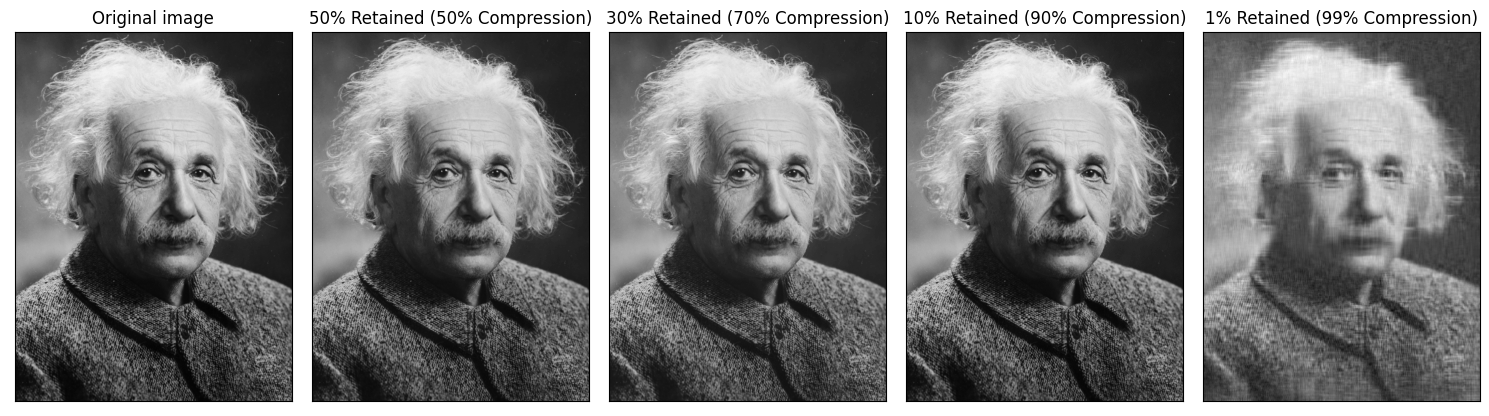

In [106]:
f,ax = plt.subplots(ncols=5)
f.set_size_inches(15,40)

ax[0].set_title('Original image')
ax[0].imshow(einstein_arary, cmap='gray')

titles = ['50% Retained (50% Compression)', '30% Retained (70% Compression)',
            '10% Retained (90% Compression)', '1% Retained (99% Compression)']
for i in range(4):
    ax[i+1].set_title(titles[i])
    ax[i+1].imshow(reduced_einstein[i], cmap='gray')

for a in ax:
    a.xaxis.set_visible(False)
    a.yaxis.set_visible(False)

plt.tight_layout()
plt.show()

After performing SVD on the image of size 4333 x 3250, we got 3250 Singular Value in the Diagonal Matrix $Σ$, of which we are using the highest 30%, which is 975 singular values and making all the other as zero, to compress the image by 70%.

Even after compressing the image to 70% and retaning only 30% of the data, the Einstein is clear in the image and only the very fine details in the image are lost.

This was even more evident when we loss 99% of the singular values and only use top 1%, which makes the image blurry due to high loss of data. But even than the person in the image is clearly visible.

## Problem 4 

Calculate the Gradient of the following functions 

(a) $f(x,y)=x+3y^2$,

(b) $f(x,y)=\sqrt{x^2+y^2}$

### Solution

#### (a)

$$
\triangledown f(x,y) = 
\begin{bmatrix}
\frac{\partial f}{\partial x}\\
\frac{\partial f}{\partial y}
\end{bmatrix}
$$

$$
\frac{\partial f}{\partial x} = \frac{\partial (x+3y^2)}{\partial x}
= 1
$$

$$
\frac{\partial f}{\partial x} = \frac{\partial (x+3y^2)}{\partial y}
= 6y
$$

$\triangledown f(x,y) = \begin{bmatrix}
1\\
6y
\end{bmatrix}$

### (b)

$$
\triangledown f(x,y) = 
\begin{bmatrix}
\frac{\partial f}{\partial x}\\
\frac{\partial f}{\partial y}
\end{bmatrix}
$$

$$
\frac{\partial f}{\partial x} = \frac{\partial (\sqrt{x^2+y^2})}{\partial x}
= \frac{x}{\sqrt{x^2+y^2}}
$$

$$
\frac{\partial f}{\partial x} = \frac{\partial (\sqrt{x^2+y^2})}{\partial y}
= \frac{y}{\sqrt{x^2+y^2}}
$$

$\triangledown f(x,y) = 
\begin{bmatrix}
\frac{x}{\sqrt{x^2+y^2}}\\
\frac{y}{\sqrt{x^2+y^2}}
\end{bmatrix}$

## Problem 5

Consider the optimization problem:

minimize $(1/2)x^TPx + q^Tx + r$

subject to $−1≤x_i≤1, i=1,2,3$

where, 

$$
P = \begin{bmatrix}
13 & 12 & -2\\
12 & 17 & 6\\
-2 & 6 & 12\\
\end{bmatrix},
q = \begin{bmatrix}
-22\\
-14.5\\
13.0\\
\end{bmatrix},
r = 1
$$

(a) Show that the problem is convex ( Hint : $x^TAx$ is convex if $A$ is positive semi-definite) 

(b) Solve the optimization problem using Projected Gradient Descent method.

(c) Attempt to solve the problem mathematically and find the optimal solution

### Solution

#### (a)

To prove the minimization equation is convex, we can prove that each component is convex. The term $q^Tx$ is linear and hence convex, so we only need to prove $x^TPx$ is convex to proof the entire equation is convex

We know (from Hint), $x^TAx$ is convex if $A$ is positive semi-definite, which means A should have non-negative eigen values.

For Eigen Values of P, we need to solve the Characteristic equation which is $|P - \lambda I| = 0$

$$
|P-\lambda I| =
\begin{vmatrix}
13-\lambda & 12 & -2\\
12 & 17-\lambda & 6\\
-2 & 6 & 12-\lambda
\end{vmatrix} = 0
$$

(Using Triangle's Rule)
$$
(-λ+13)*(-λ+17)*(-λ+12)+12*6*(-2)+\\
(-2)*12*6-(-2)*(-λ+17)*(-2)-6*\\6*(-λ+13)-(-λ+12)*12*12 = 0
$$

$$-λ^3+42*λ^2-397*λ+100 = 0$$

Solving it using a solver, we get

$$\lambda = 0.259, 13.843, 27.898$$

Since, all the Eigen Values of P are positive, P is positive semi-definite matrix, hence $x^TPx$ is convex.

The entire equation $(1/2)x^TPx + q^Tx + r$ is **convex**

#### (b)

In [79]:
x = np.array([1.9,-1.5])
np.sign(x)

array([ 1., -1.])

In [111]:
def func(x, P, q, r):
    return (x.T@P)@x + q.T@x + r

def func_diff(x, P, q, r):
    return P.T@x + q

def update_x(x, grad, alpha=0.0001):
    x  = x - alpha*grad
    # Take Minimum Value of Element or 1
    # Multiply by it's original sign to get back sign
    x = np.minimum(1,np.abs(x)) * np.sign(x)
    return x

In [112]:
x = np.random.random(3).reshape(3,1)
P = np.array([
    [13,12,-2],
    [12,17,6],
    [-2,6,12]
])
q = np.array([-22,-14.5, 13]).reshape(3,1)
r = 1

for _ in range(100_000):
    x = update_x(x, func_diff(x,P,q,r)) 

x

array([[ 1. ],
       [ 0.5],
       [-1. ]])

#### (c)
Constrained Optimization

$$
f(x) = (1/2)x^TPx + q^Tx + r + \lambda_1 (x - 1) + \lambda_2 (x + 1)
$$

$$
\frac{\partial f}{\partial \lambda_1} = x-1 = 0\\
x = 1\\
x = 
\begin{bmatrix}
1\\
1\\
1\\
\end{bmatrix}
$$

$$
\frac{\partial f}{\partial \lambda_2} = x+1 = 0\\
x = -1\\x = 
\begin{bmatrix}
-1\\
-1\\
-1\\
\end{bmatrix}
$$

$$
\frac{\partial f}{\partial x} = 1/2(P + P^T)x + q^T + \lambda_1 + \lambda_2
$$

$$
\frac{\partial f}{\partial x} = Px + q^T + \lambda_1 + \lambda_2
$$

$$\frac{\partial f}{\partial x} = 0$$

$$\lambda_1 = 0, \lambda_2 = 0$$

$$
\frac{\partial f}{\partial x} = 0\\
Px + q^T = 0
$$

Putting Values of P and q
$$
\begin{bmatrix}
13 & 12 & -2\\
12 & 17 & 6\\
-2 & 6 & 12\\
\end{bmatrix}.
\begin{bmatrix}
x_1\\
x_2\\
x_3\\
\end{bmatrix} +
\begin{bmatrix}
-22\\
-14.5\\
13.0\\
\end{bmatrix} = 0
$$

$$
13x_1 + 12x_2 - 2x_3 - 22 = 0
$$
$$
12x_1 + 17x_2 + 6x_3 - 14.5 = 0
$$
$$
-2x_1 + 6x_2 + 12x_3 + 13 = 0
$$

On solving for $x_1, x_2 and x_3$, we get

$$x = 
\begin{bmatrix}
0.56\\
0.98\\
-1.48\\
\end{bmatrix}
$$

Finally 
$$
x = 
\begin{bmatrix}
1\\
1\\
1\\
\end{bmatrix},
\begin{bmatrix}
-1\\
-1\\
-1\\
\end{bmatrix},
\begin{bmatrix}
0.56\\
0.98\\
-1.48\\
\end{bmatrix}
$$

Selecting the minimum values to be under constrain:

$$
x = 
\begin{bmatrix}
0.56\\
0.98\\
-1\\
\end{bmatrix}
$$

In [7]:
x = np.random.random(3).reshape(3,1)
P = np.array([
    [13,12,-2],
    [12,17,6],
    [-2,6,12]
])
q = np.array([-22,-14.5, 13])
r = 1

x = np.array([0.56, 0.98, -1])

P@x.T + q

array([-0.96,  2.88,  5.76])